# HOME LOAN DEFAULT PREDICTION

## Made by Team Id - PTID-CDS-MAY-23-1515 

## Project Id - PRCP-1006-HomeLoanDef



### Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model  to  identify the factors / customer segments that are eligible for taking loan.
    
### Dataset Link:

Link : https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1006-HomeLoanDef.zip

 
### Data Description

#### 1. application_train.csv
The main file which contains the Target(1:Defaulter ; 0: Not Defaulter)

Static data for all applications. One row represents one loan in our data sample.

#### 2. bureau.csv

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).

For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

#### 3. bureau_balance.csv

Monthly balances of previous credits in Credit Bureau.

This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

#### 4. POS_CASH_balance.csv

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.

This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

#### 5. credit_card_balance.csv

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.

This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

#### 6. previous_application.csv

All previous applications for Home Credit loans of clients who have loans in our sample.

There is one row for each previous application related to loans in our data sample.

#### 7. installments_payments.csv

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.

There is a) one row for every payment that was made plus b) one row each for missed payment.

One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.


### Model Comparison Report

Create a report stating the performance of multiple models on this data and suggest the best model for production.

### Report on Challenges faced

Create a report which should include challenges you faced on data and what technique used, with proper reason.


Note:-All above tasks has to be created on a single jupyter notebook and share the same for the final submission.


### Importing Libraries 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz as sv
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
from scipy.stats import randint

## Importing dataset

In [2]:
data = pd.read_csv("application_train.csv")

In [3]:
print ("application_train     :",data.shape)

application_train     : (307511, 122)


### Basic checks

In [4]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.0000,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2

In [6]:
list1 = data.columns

for i in list1:
    print(i)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
data.shape

(307511, 122)

### Domain Analysis

1. application_train.csv: This is the main table with Terget variable.The training applicaton data comes with the TARGET indicating 0: the loan was repaid of 1: the loan was not repaid.

1. SK_ID_CURR: Unique identifier for each individual in the dataset.
2. TARGET: The target variable or outcome that is being predicted or classified.
3. NAME_CONTRACT_TYPE: Type of contract the individual has (e.g., cash loans, revolving loans).
4. CODE_GENDER: Gender of the individual.
5. FLAG_OWN_CAR: Indicates whether the individual owns a car or not.
6. FLAG_OWN_REALTY: Indicates whether the individual owns real estate or not.
7. CNT_CHILDREN: Number of children the individual has.
8. AMT_INCOME_TOTAL: Total income of the individual.
9. AMT_CREDIT: Total amount of credit the individual has.
10. AMT_ANNUITY: Annuity amount the individual has to pay.
11. AMT_GOODS_PRICE: Price of goods for which the loan is given.
12. NAME_TYPE_SUITE: Who was accompanying the individual when applying for the loan.
13. NAME_INCOME_TYPE: Type of income the individual has (e.g., working, maternity leave, pensioner).
14. NAME_EDUCATION_TYPE: Educational level of the individual.
15. NAME_FAMILY_STATUS: Family status of the individual.
16. NAME_HOUSING_TYPE: Type of housing the individual lives in.
17. REGION_POPULATION_RELATIVE: Relative population of the region where the individual lives.
18. DAYS_BIRTH: Number of days since the individual was born.
19. DAYS_EMPLOYED: Number of days the individual has been employed.
20. DAYS_REGISTRATION: Number of days since the individual's registration.
21. DAYS_ID_PUBLISH: Number of days since the individual's ID was published.
22. OWN_CAR_AGE: Age of the individual's car.
21. FLAG_MOBIL: Indicates whether the individual has a mobile phone or not.
23. FLAG_EMP_PHONE: Indicates whether the individual has an employer phone or not.
24. FLAG_WORK_PHONE: Indicates whether the individual has a work phone or not.
25. FLAG_CONT_MOBILE: Indicates whether the individual's mobile can be reached continuously or not.
26. FLAG_PHONE: Indicates whether the individual has a phone or not.
27. FLAG_EMAIL: Indicates whether the individual has an email or not.
28. OCCUPATION_TYPE: Occupation of the individual.
29. CNT_FAM_MEMBERS: Number of family members the individual has.
30. REGION_RATING_CLIENT: Region rating of the client's home address.
31. REGION_RATING_CLIENT_W_CITY: Region rating of the client's work address.
32. WEEKDAY_APPR_PROCESS_START: Weekday on which the loan application was started.
33. HOUR_APPR_PROCESS_START: Hour of the day when the loan application was started.
34. REG_REGION_NOT_LIVE_REGION: Indicates if the client's permanent address does not match the region.
35. REG_REGION_NOT_WORK_REGION: Indicates if the client's work address does not match the region.
36. LIVE_REGION_NOT_WORK_REGION: Indicates if the client's living address does not match the region.
37. REG_CITY_NOT_LIVE_CITY: Indicates if the client's permanent address does not match the city.
38. REG_CITY_NOT_WORK_CITY: Indicates if the client's work address does not match the city.
39. LIVE_CITY_NOT_WORK_CITY: Indicates if the client's living address does not match the city.
40. ORGANIZATION_TYPE: Type of organization the client works for.
41. EXT_SOURCE_1: External data source that provides information about the individual.
42. EXT_SOURCE_2: Another external data source that provides information about the individual.
43. EXT_SOURCE_3: Yet another external data source that provides information about the individual.
44. APARTMENTS_AVG: Average area of apartments in the building where the individual lives.
45. BASEMENTAREA_AVG: Average area of the basement in the building where the individual lives.
46. YEARS_BEGINEXPLUATATION_AVG: Average number of years since the building was first used.
47. YEARS_BUILD_AVG: Average number of years since the building was built.
48. COMMONAREA_AVG: Average common area of the building where the individual lives.
49. ELEVATORS_AVG: Average number of elevators in the building where the individual lives.
50. ENTRANCES_AVG: Average number of entrances in the building where the individual lives.
51.  FLOORSMAX_AVG: Average maximum number of floors in the building where the individual lives.
52. FLOORSMIN_AVG: Average minimum number of floors in the building where the individual lives.
53. LANDAREA_AVG: Average land area of the building where the individual lives.
54. LIVINGAPARTMENTS_AVG: Average area of living apartments in the building where the individual lives.
55. LIVINGAREA_AVG: Average living area in the building where the individual lives.
56. NONLIVINGAPARTMENTS_AVG: Average area of non-living apartments in the building where the individual lives.
57. NONLIVINGAREA_AVG: Average non-living area in the building where the individual lives.
58. APARTMENTS_MODE: Mode of the area of apartments in the building where the individual lives.
59. BASEMENTAREA_MODE: Mode of the area of the basement in the building where the individual lives.
60. YEARS_BEGINEXPLUATATION_MODE: Mode of the number of years since the building was first used.
61. YEARS_BUILD_MODE: Mode of the number of years since the building was built.
62. Please note that this is an interpretation based on the column names provided, and the actual meanings and data types of the columns may vary depending on the specific dataset.
63. COMMONAREA_MODE: Mode of the common area in the building where the individual lives.
64. ELEVATORS_MODE: Mode of the number of elevators in the building where the individual lives.
65. ENTRANCES_MODE: Mode of the number of entrances in the building where the individual lives.
66. FLOORSMAX_MODE: Mode of the maximum number of floors in the building where the individual lives.
67. FLOORSMIN_MODE: Mode of the minimum number of floors in the building where the individual lives.
68. LANDAREA_MODE: Mode of the land area of the building where the individual lives.
69. LIVINGAPARTMENTS_MODE: Mode of the area of living apartments in the building where the individual lives.
70. LIVINGAREA_MODE: Mode of the living area in the building where the individual lives.
71. NONLIVINGAPARTMENTS_MODE: Mode of the area of non-living apartments in the building where the individual lives.
72. NONLIVINGAREA_MODE: Mode of the non-living area in the building where the individual lives.
73. APARTMENTS_MEDI: Median of the area of apartments in the building where the individual lives.
74. BASEMENTAREA_MEDI: Median of the area of the basement in the building where the individual lives.
75. YEARS_BEGINEXPLUATATION_MEDI: Median of the number of years since the building was first used.
76. YEARS_BUILD_MEDI: Median of the number of years since the building was built.
77. COMMONAREA_MEDI: Median of the common area in the building where the individual lives.
78. ELEVATORS_MEDI: Median of the number of elevators in the building where the individual lives.
79. ENTRANCES_MEDI: Median of the number of entrances in the building where the individual lives.
80. FLOORSMAX_MEDI: Median of the maximum number of floors in the building where the individual lives.
81. FLOORSMIN_MEDI: Median of the minimum number of floors in the building where the individual lives.
82. LANDAREA_MEDI: Median of the land area of the building where the individual lives.
83. LIVINGAPARTMENTS_MEDI: Median of the area of living apartments in the building where the individual lives.
84. LIVINGAREA_MEDI: Median of the living area in the building where the individual lives.
85. NONLIVINGAPARTMENTS_MEDI: Median of the area of non-living apartments in the building where the individual lives.
86. NONLIVINGAREA_MEDI: Median of the non-living area in the building where the individual lives.
87. FONDKAPREMONT_MODE: Indicates the status of the building fund.
88. HOUSETYPE_MODE: Type of the house where the individual lives.
89. TOTALAREA_MODE: Mode of the total area of the building where the individual lives.
90. WALLSMATERIAL_MODE: Mode of the wall material of the building where the individual lives.
91. EMERGENCYSTATE_MODE: Mode indicating if the individual's address is in an emergency state.
92. OBS_30_CNT_SOCIAL_CIRCLE: Number of observations of social circles with default 30 DPD (days past due).
93. DEF_30_CNT_SOCIAL_CIRCLE: Number of defaults on the 30 DPD (days past due) observations of social circles.
94. OBS_60_CNT_SOCIAL_CIRCLE: Number of observations of social circles with default 60 DPD (days past due).
95. DEF_60_CNT_SOCIAL_CIRCLE: Number of defaults on the 60 DPD (days past due) observations of social circles.
96. DAYS_LAST_PHONE_CHANGE: Number of days since the individual's last phone change.
97. FLAG_DOCUMENT_2 to FLAG_DOCUMENT_21: Indicates whether the individual submitted a specific document (e.g., ID, proof of income).
98. AMT_REQ_CREDIT_BUREAU_HOUR: Number of inquiries to the Credit Bureau about the individual during the last hour.
99. AMT_REQ_CREDIT_BUREAU_DAY: Number of inquiries to the Credit Bureau about the individual during the last day.
100. AMT_REQ_CREDIT_BUREAU_WEEK: Number of inquiries to the Credit Bureau about the individual during the last week.
101. AMT_REQ_CREDIT_BUREAU_MON: Number of inquiries to the Credit Bureau about the individual during the last month.
102. AMT_REQ_CREDIT_BUREAU_QRT: Number of inquiries to the Credit Bureau about the individual during the last quarter.
103. AMT_REQ_CREDIT_BUREAU_YEAR: Number of inquiries to the Credit Bureau about the individual during the last year.

## Exploratory Data Analysis 

### Checking dataset

In [9]:
data.shape

(307511, 122)

The data has 307511 rows and 122 columns

In [10]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [11]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [12]:
data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [13]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


### Checking target variabel

0    282686
1     24825
Name: TARGET, dtype: int64

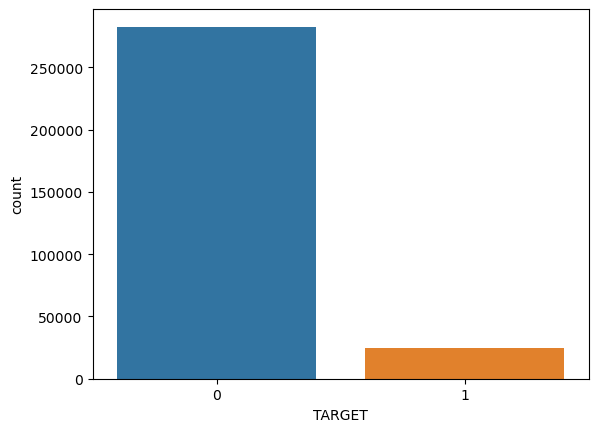

In [15]:
sns.countplot(x = "TARGET", data = data)
data.loc[:, 'TARGET'].value_counts()

The data has target = 0 for people who can repay the loan and target = 1 for people who cannot repay the loan. The data is imbalanced because there is a high number of clients who repay the loan compared to clients who default.

### Checking for missing values

In [16]:
pd.DataFrame(data.isnull().sum().sort_values(ascending = False))

,0
COMMONAREA_MEDI,214865
COMMONAREA_AVG,214865
COMMONAREA_MODE,214865
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_AVG,213514
NONLIVINGAPARTMENTS_MEDI,213514
FONDKAPREMONT_MODE,210295
LIVINGAPARTMENTS_MODE,210199
LIVINGAPARTMENTS_AVG,210199
LIVINGAPARTMENTS_MEDI,210199


There are quite a missing values lets check it further 

### Creating a function to check missing values 

In [17]:
# Function to calculate missing values by column
def missing_values_table(data):
    # Total missing values
    mis_val = data.isnull().sum()
    
    # percentage of missing values
    mis_val_percent = 100 * data.isnull().sum() / len(data)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns= {0: 'Missing Values', 1 : '% of Total Values'})
    
    # sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
     # print some summary information
    print('Your selected dataframe has ' + str(data.shape[1]) +
         " columns.\n"
         "There are " + str(mis_val_table_ren_columns.shape[0]) +
         " columns that have missing values.")
    
    # return the dataframe with missing in information
    return mis_val_table_ren_columns

In [18]:
# missing values statistics
missing_values = missing_values_table(data)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


There are huge number of missing values in some columns that might affect the accuracy avg missing value is around 60-69%

In [19]:
data.dtypes.value_counts()   #checking types of data

float64    65
int64      41
object     16
dtype: int64

In [20]:
# unique values
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Univarient analysis

In [64]:
import sweetviz as sv#importing sweetviz library 
my_report = sv.analyze(data)#syntax to use sweetviz
my_report.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                                                …

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


1. The data is imbalanced because there is a high number of clients who repay the loan compared to clients who default.
2. There are more cash loan than revolving loan contract.
3. 66% of the people dont own cars and other peoples who owns the cars their cars ages between 0-20 years
4. 69% of the peples owns real estate
7. There are 70% of people who dont have any childrent in the dataset. 81% people unaccompanied but still more than 60% people are married 
9. highest amout of perople are normal working and the most of the peoples education is secondary or secondary special
10. mostly peoples are living in house/apartment
11. almost all peoples got mobiles and around 80% got work phone. still 90% of peoples dont have their email.
12. There are highest number of people who dont have all the documents

### Bivarient analysis

In [21]:
def plot_bar_gen(feature, df = None, orientation_horizontal = True):
    
    if df is None:
        df = data
    else:
        df = df
    
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    sns.set_color_codes("bright")
    
    if orientation_horizontal == True:
        plt.figure(figsize=(10,6))
        plt.subplot(121)
        s1 = sns.barplot(y = feature, x="Number of contracts",data=df1)
        plt.subplot(122)
        s2 = sns.barplot(y = feature, x='TARGET', data=cat_perc)
        plt.xlabel('Fraction of loans defaulted', fontsize=12)
        plt.ylabel(feature, fontsize=12)
        
    else:
        plt.figure(figsize=(10,12))
        plt.subplot(211)
        s1 = sns.barplot(x = feature, y="Number of contracts",data=df1)
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
        plt.subplot(212)
        s2 = sns.barplot(x = feature, y='TARGET', data=cat_perc)
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
        plt.ylabel('Fraction of loans defaulted', fontsize=12)
        plt.xlabel(feature, fontsize=12)
    
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.subplots_adjust(wspace = 0.8)
    plt.show();

In [22]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

<Figure size 2000x2500 with 0 Axes>

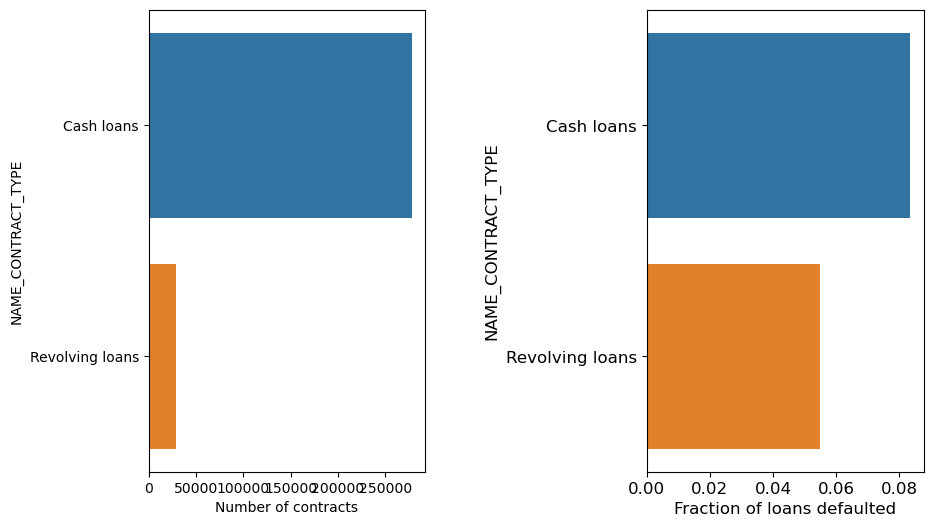

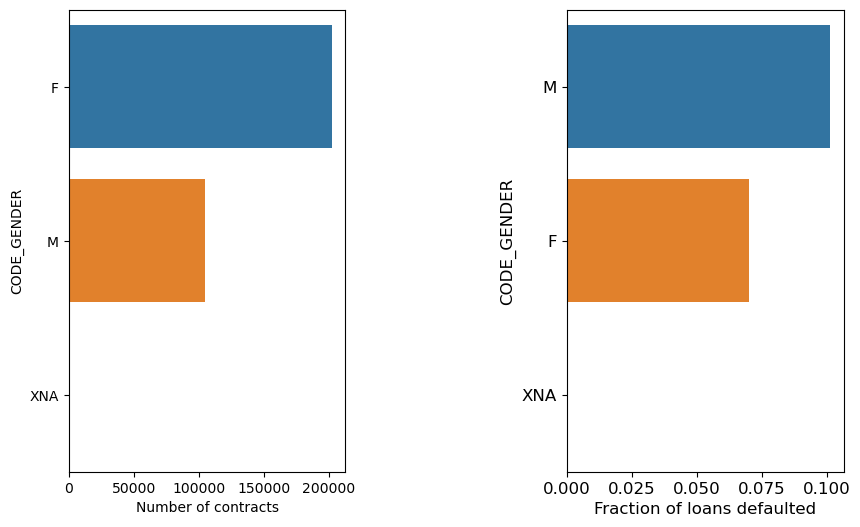

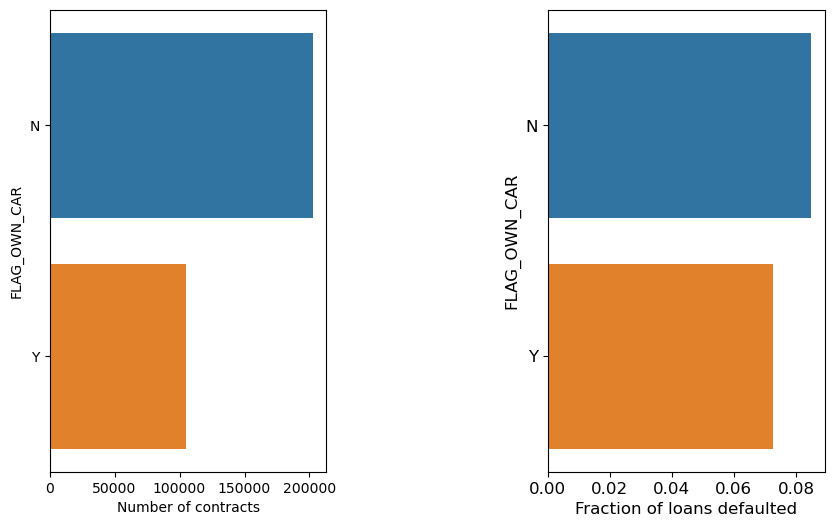

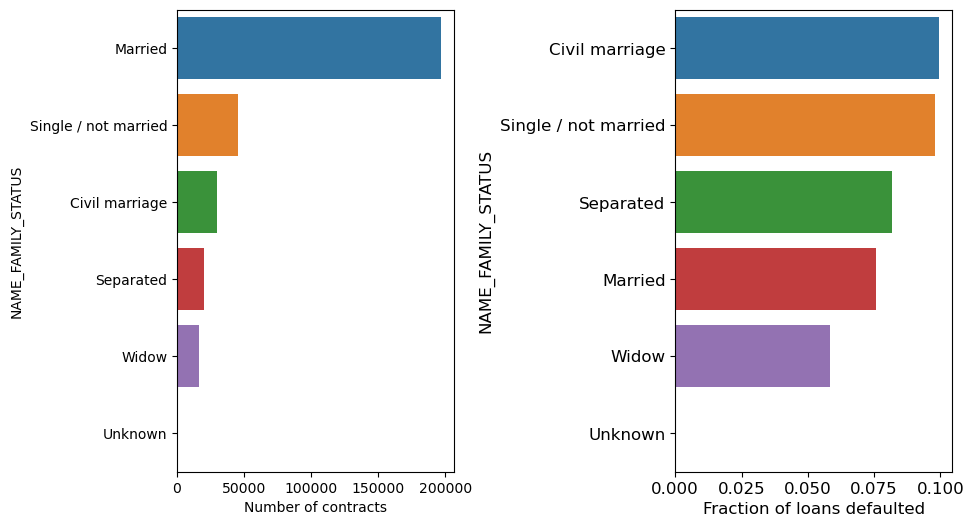

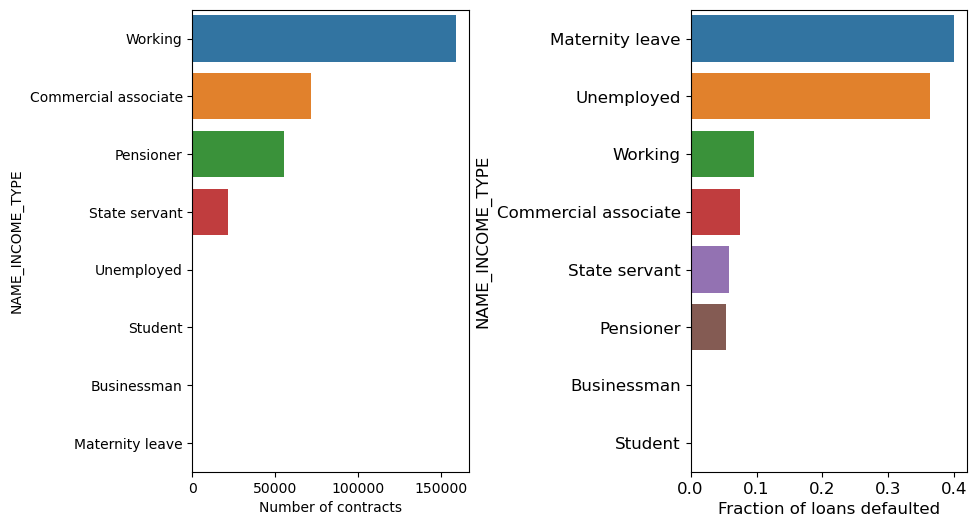

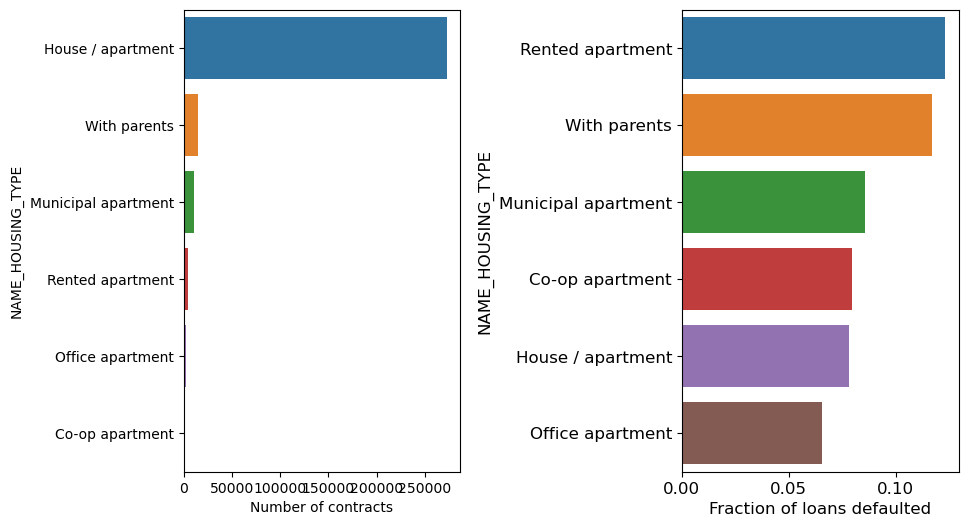

In [23]:
plt.figure(figsize=(20,25), facecolor='white')
list1 = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','NAME_FAMILY_STATUS','NAME_INCOME_TYPE','NAME_HOUSING_TYPE']

for column in list1:
    plot_bar_gen(column)

1. More cash loans types are defaulted than revolving loan.
2. Tehere are more number of females than males but highest number of loans were defaulted by males.
3. Mostly peoples dont own a car their FRaction to defaul the loan is  0.08 for not owning the car and 0.07 for owning car.
4. highest number of peoples are married and the people who where married and peoples who where single highly defaulted the loan.
5. people with unemployed and people on meternity leave have mostly defaulted the loan were as peoples with working porfession ae the highest in number.
6. Most of the poeple have their own aparment or house. poeple with rented aparment and living with parent mostly defaulted the loan

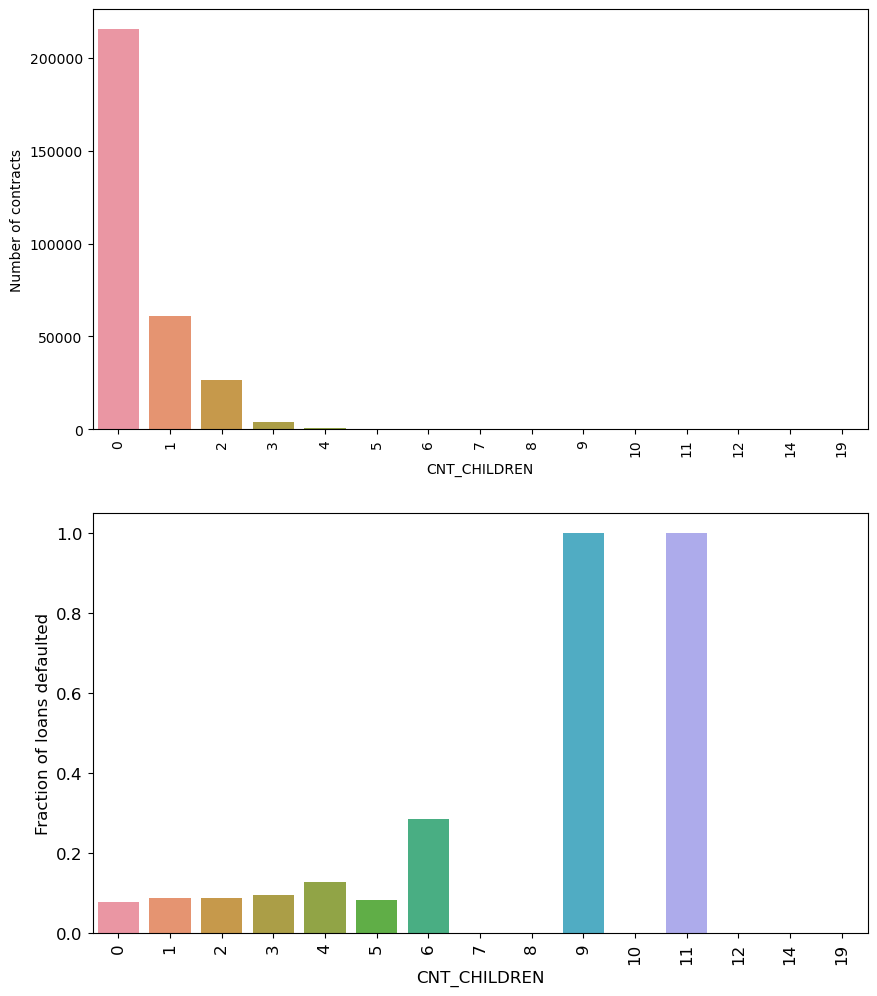

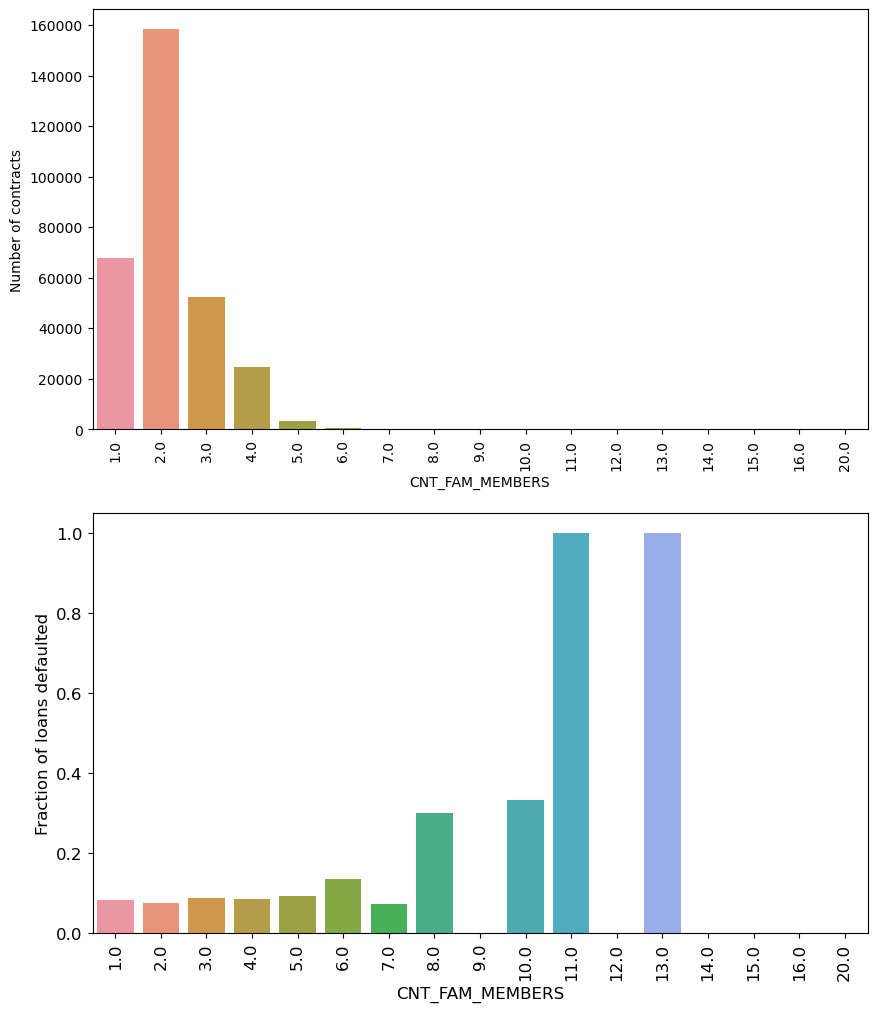

In [24]:
plot_bar_gen('CNT_CHILDREN',None,False)
plot_bar_gen('CNT_FAM_MEMBERS',None,False)

1. Small family people have least defaulted the loan
2. people with bigger families mostly defaulted the loan

<Figure size 2000x2500 with 0 Axes>

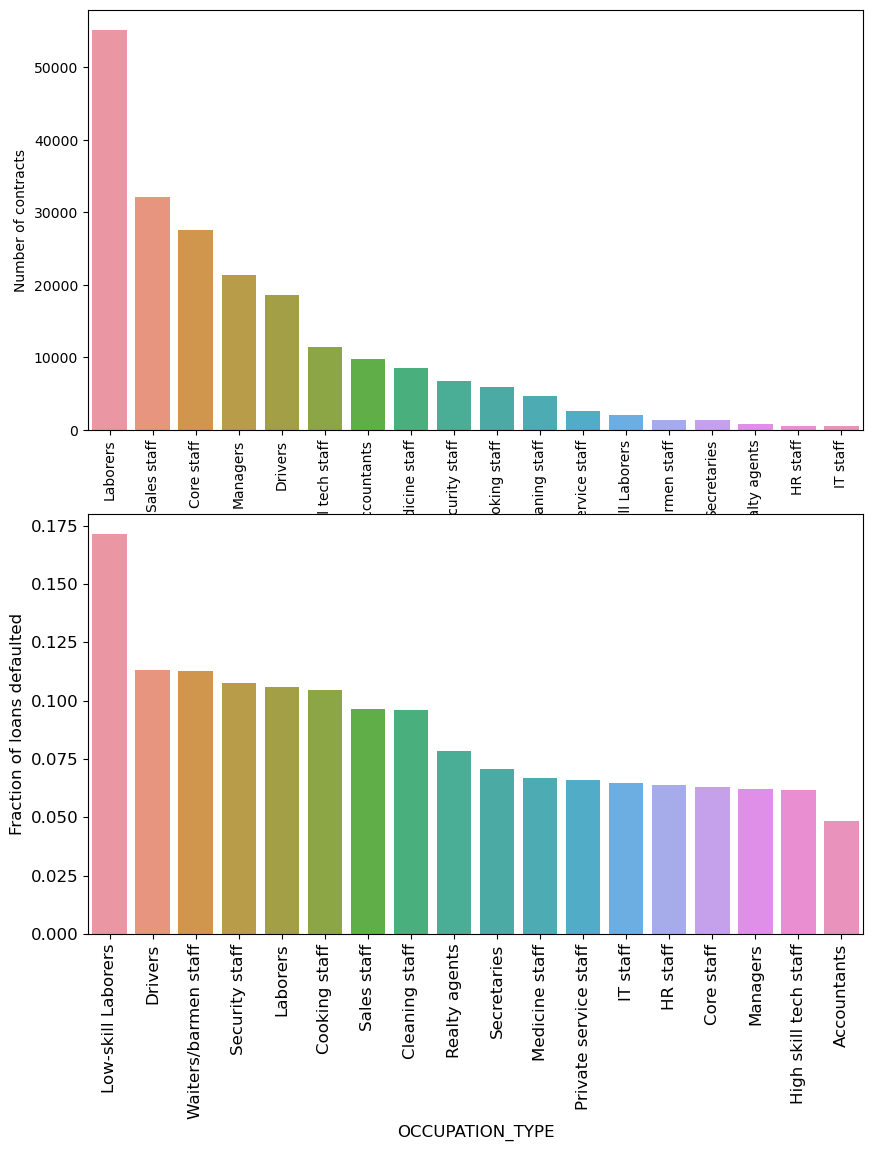

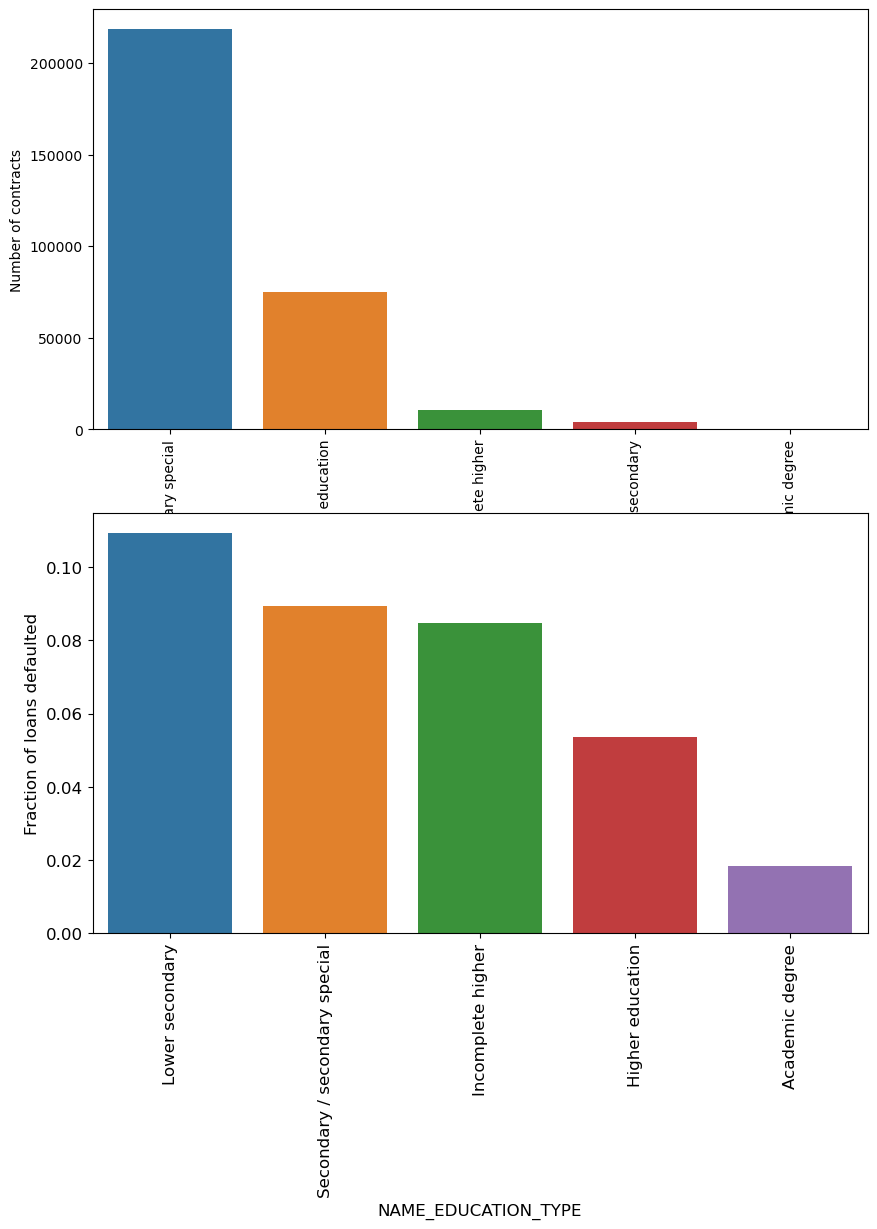

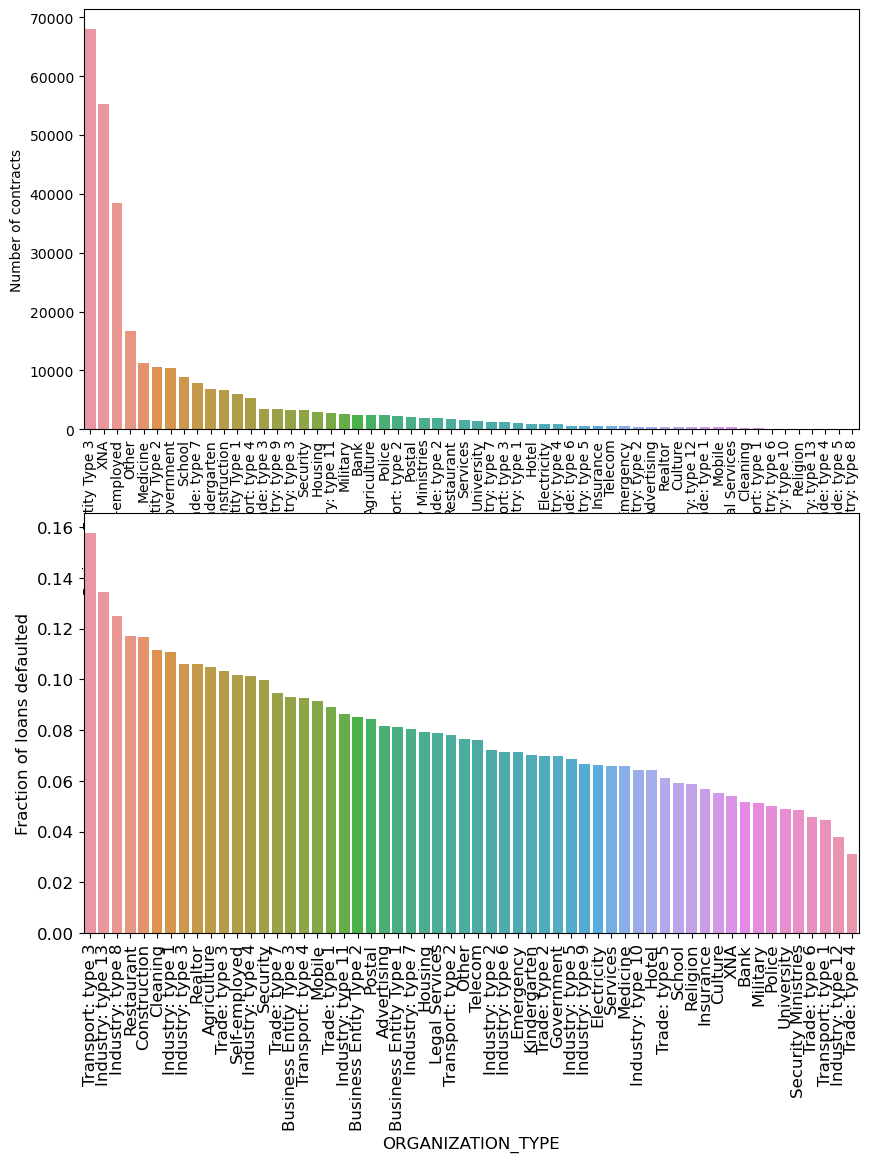

In [25]:
plt.figure(figsize=(20,25), facecolor='white')
list1 = ['OCCUPATION_TYPE','NAME_EDUCATION_TYPE','ORGANIZATION_TYPE']

for column in list1:
    plot_bar_gen(column,None,False)

1. Education and Occupation status is motly have major effect on loan default.
2. Organization type is slightly affect the loan default status.

<Figure size 2000x2500 with 0 Axes>

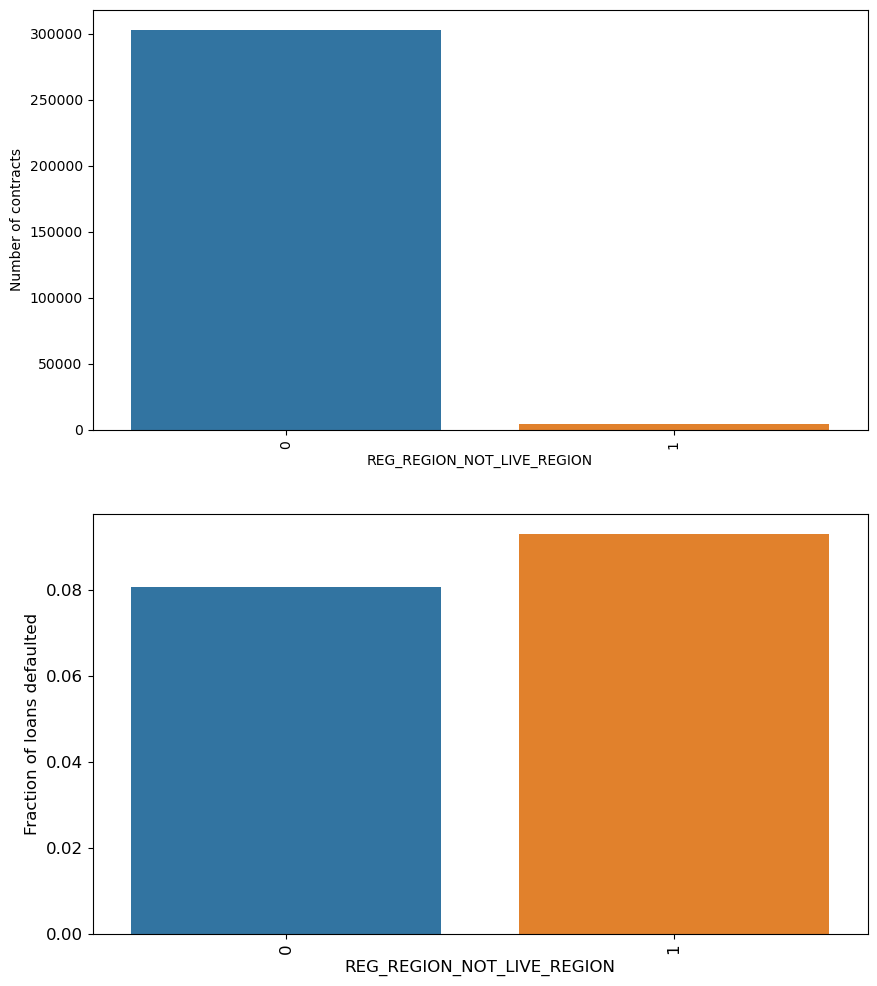

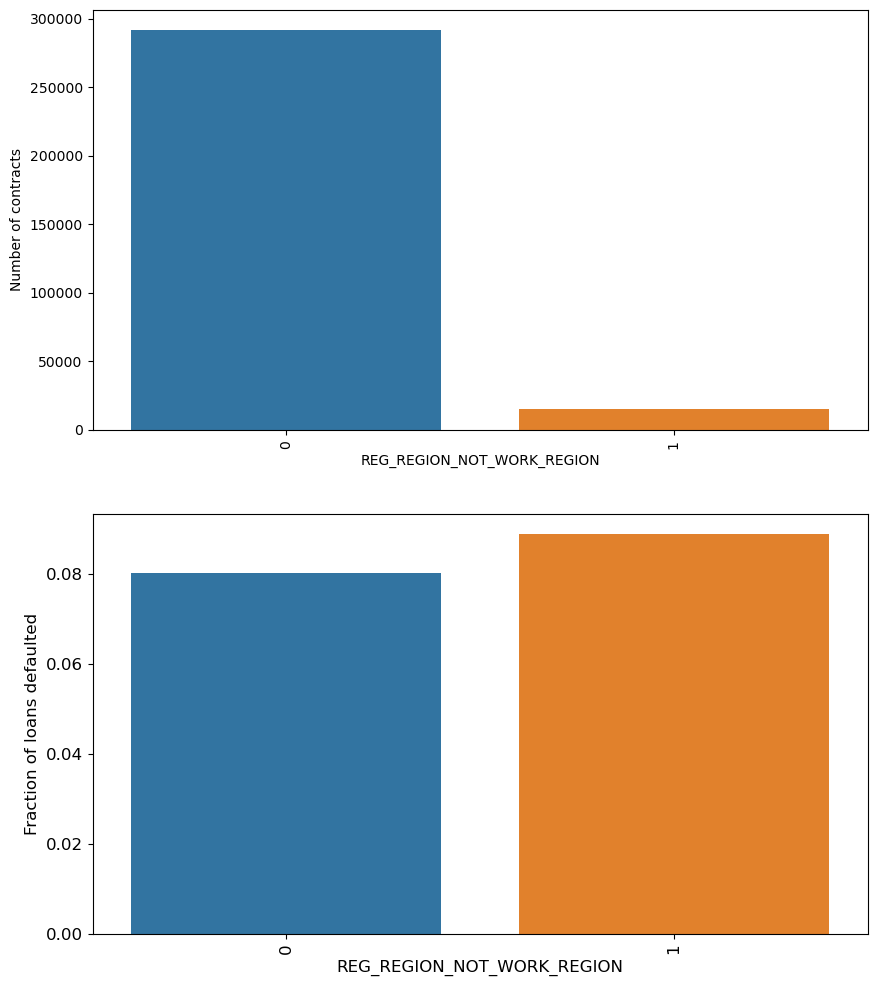

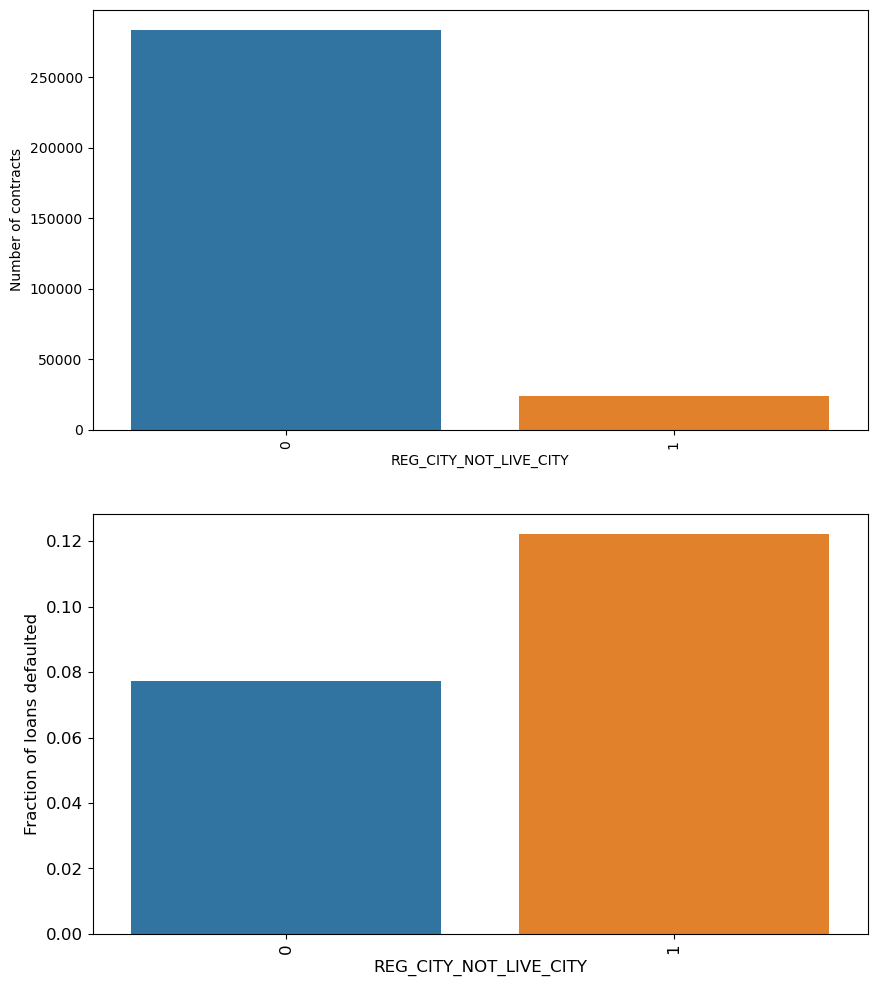

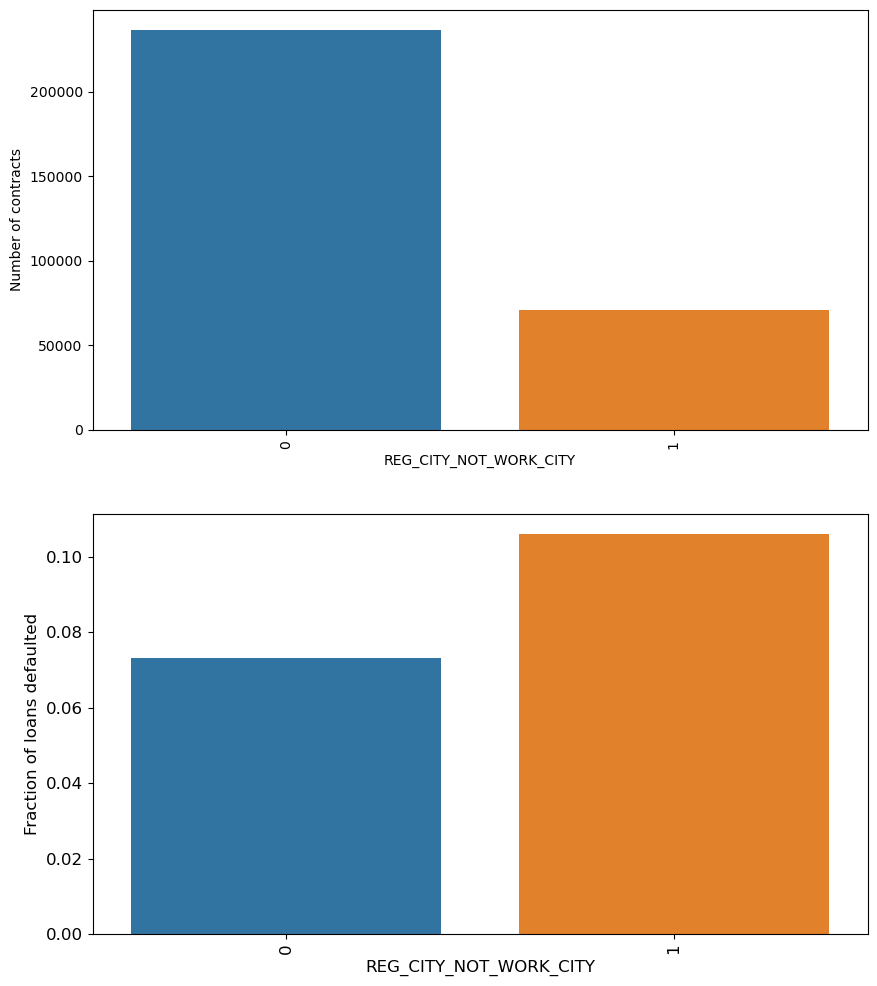

In [26]:
plt.figure(figsize=(20,25), facecolor='white')
list1 = ['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY']

for column in list1:
    plot_bar_gen(column,None,False)

1. People with permanent address region differs from the region where they currently live or work have mostly defaulted the loans as where people with permanent address region samse as the region where they currently live or work mostly not defaulted the loan

In [27]:
# Plot distribution of one feature with or without paid/default shown separately

def plot_distribution_gen(feature,df=None,separate_target=False):
    if df is None:
        df = data
    else:
        df = df
        
    if separate_target == False:
        plt.figure(figsize=(10,6))
        plt.title("Distribution of %s" % feature)
        sns.distplot(df[feature].dropna(),color='blue', kde=True,bins=100)
    else:
        t1 = df.loc[df['TARGET'] != 0]
        t0 = df.loc[df['TARGET'] == 0]
        
        plt.figure(figsize=(10,6))
        plt.title("Distribution of %s" % feature)
        sns.set_style('whitegrid')
        #sns.kdeplot(t1[feature], bw=0.5,label="Loan defaulted (TARGET=1)")
        #sns.kdeplot(t0[feature], bw=0.5,label="Loan repaid (TARGET = 0)")
        
        sns.kdeplot(df.loc[df['TARGET'] == 0, feature], label = 'target == 0')
        sns.kdeplot(df.loc[df['TARGET'] == 1, feature], label = 'target == 1')
    
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        plt.legend(loc="best", labels=['Loan repaid (TARGET=0)', 'Loan defaulted (TARGET=1)'])
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

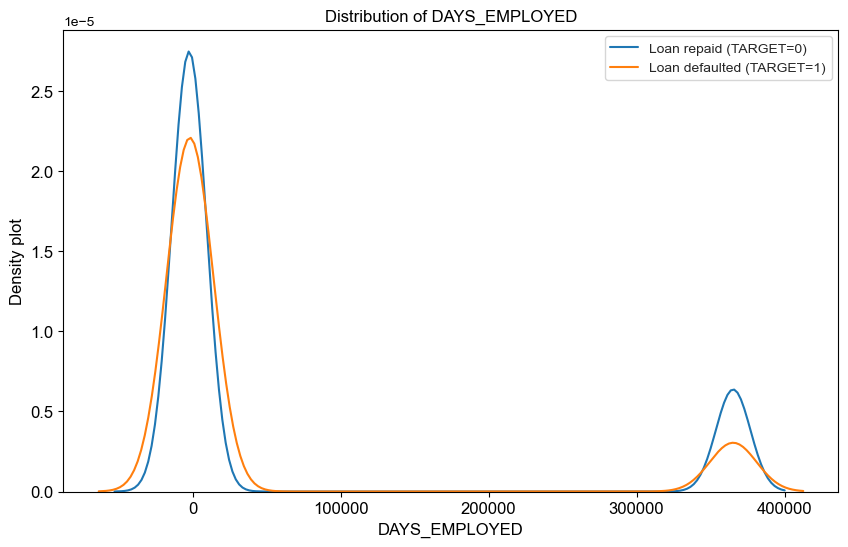

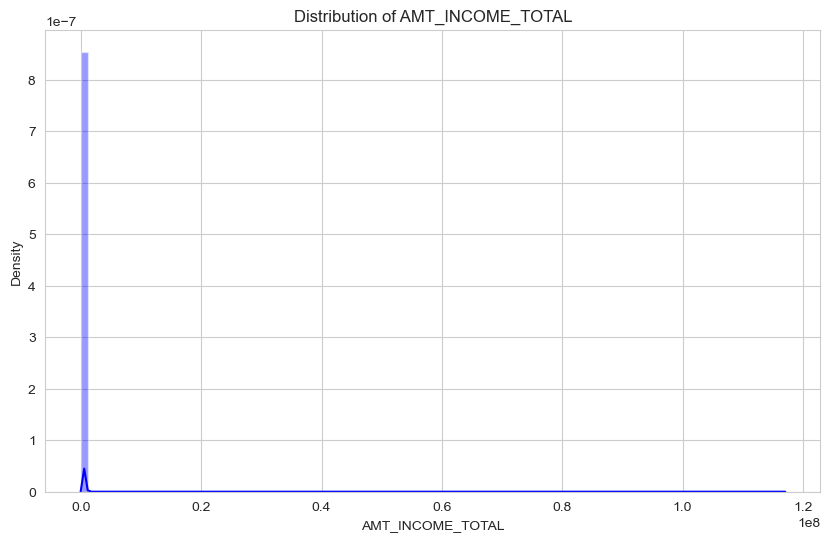

In [28]:
plot_distribution_gen('DAYS_EMPLOYED',None,True)
plot_distribution_gen('AMT_INCOME_TOTAL')

### Creating a income band according to their AMT_IMCOME

In [29]:
def get_thresh(feature):
    """ Outliers are usually > 3 standard deviations away from the mean. """
    ave=np.mean(data[feature])
    sdev=np.std(data[feature])
    threshold=round(ave+(3*sdev),2)
    print('Threshold for',feature,':',threshold)
    return threshold

In [30]:
 def create_income_band(df):
    df.loc[(df.AMT_INCOME_TOTAL < 30000),'INCOME_BAND'] = 1
    df.loc[(df.AMT_INCOME_TOTAL >= 30000)&(df.AMT_INCOME_TOTAL < 65000),'INCOME_BAND'] = 2
    df.loc[(df.AMT_INCOME_TOTAL >= 65000)&(df.AMT_INCOME_TOTAL < 95000),'INCOME_BAND'] = 3
    df.loc[(df.AMT_INCOME_TOTAL >= 95000)&(df.AMT_INCOME_TOTAL < 130000),'INCOME_BAND'] = 4
    df.loc[(df.AMT_INCOME_TOTAL >= 130000)&(df.AMT_INCOME_TOTAL < 160000),'INCOME_BAND'] = 5
    df.loc[(df.AMT_INCOME_TOTAL >= 160000)&(df.AMT_INCOME_TOTAL < 190000),'INCOME_BAND'] = 6
    df.loc[(df.AMT_INCOME_TOTAL >= 190000)&(df.AMT_INCOME_TOTAL < 220000),'INCOME_BAND'] = 7
    df.loc[(df.AMT_INCOME_TOTAL >= 220000)&(df.AMT_INCOME_TOTAL < 275000),'INCOME_BAND'] = 8
    df.loc[(df.AMT_INCOME_TOTAL >= 275000)&(df.AMT_INCOME_TOTAL < 325000),'INCOME_BAND'] = 9
    df.loc[(df.AMT_INCOME_TOTAL >= 325000),'INCOME_BAND'] = 10
    return df

In [31]:
create_income_band(data);

Text(0.5, 1.0, 'Income data for people repaying loans')

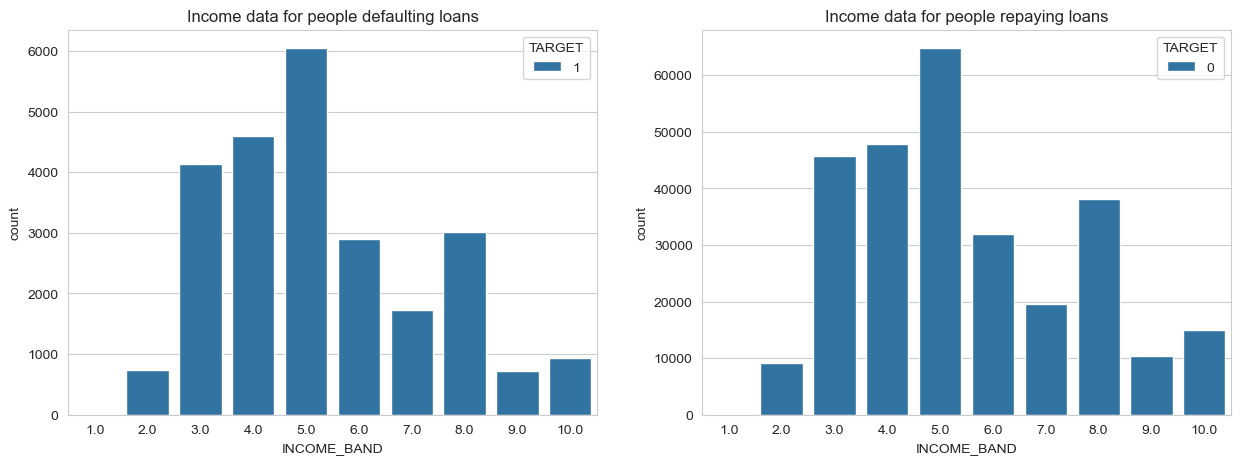

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data=data[data.TARGET==1],x='INCOME_BAND',hue='TARGET').set_title('Income data for people defaulting loans')
plt.subplot(122)
sns.countplot(data=data[data.TARGET==0],x='INCOME_BAND',hue='TARGET').set_title('Income data for people repaying loans')

<Figure size 1500x500 with 0 Axes>

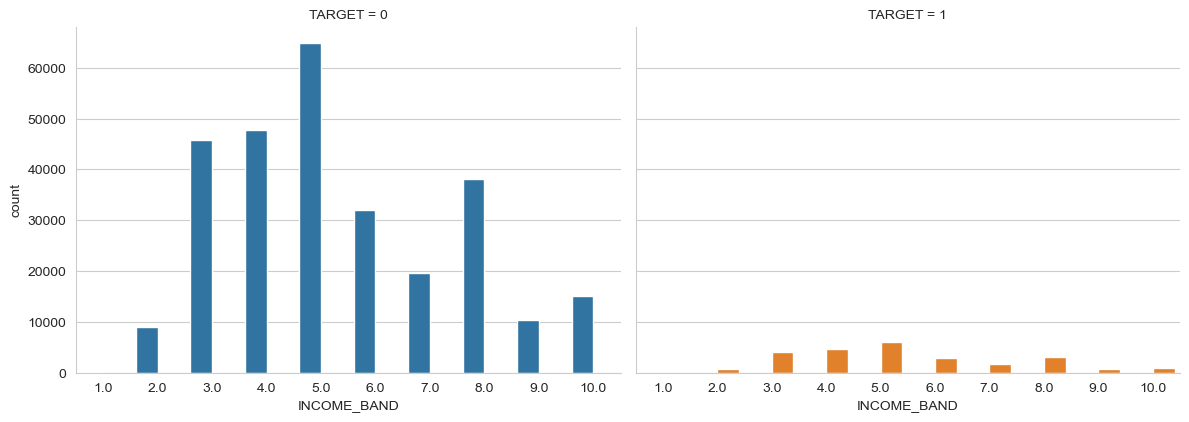

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Combine the count plots in one plane using catplot
sns.catplot(data=data, x='INCOME_BAND', hue='TARGET', col='TARGET', kind='count', height=5, aspect=1.2)

# Set the titles for each subplot
plt.subplots_adjust(top=0.8, hspace=0)

# Show the plot
plt.show()


There is no difference in peoples income who are paying loan and who are defaulting loans 

There are very few peoples who are defaulting loans

## Data pre processing 

### Checking the outliers using boxplot

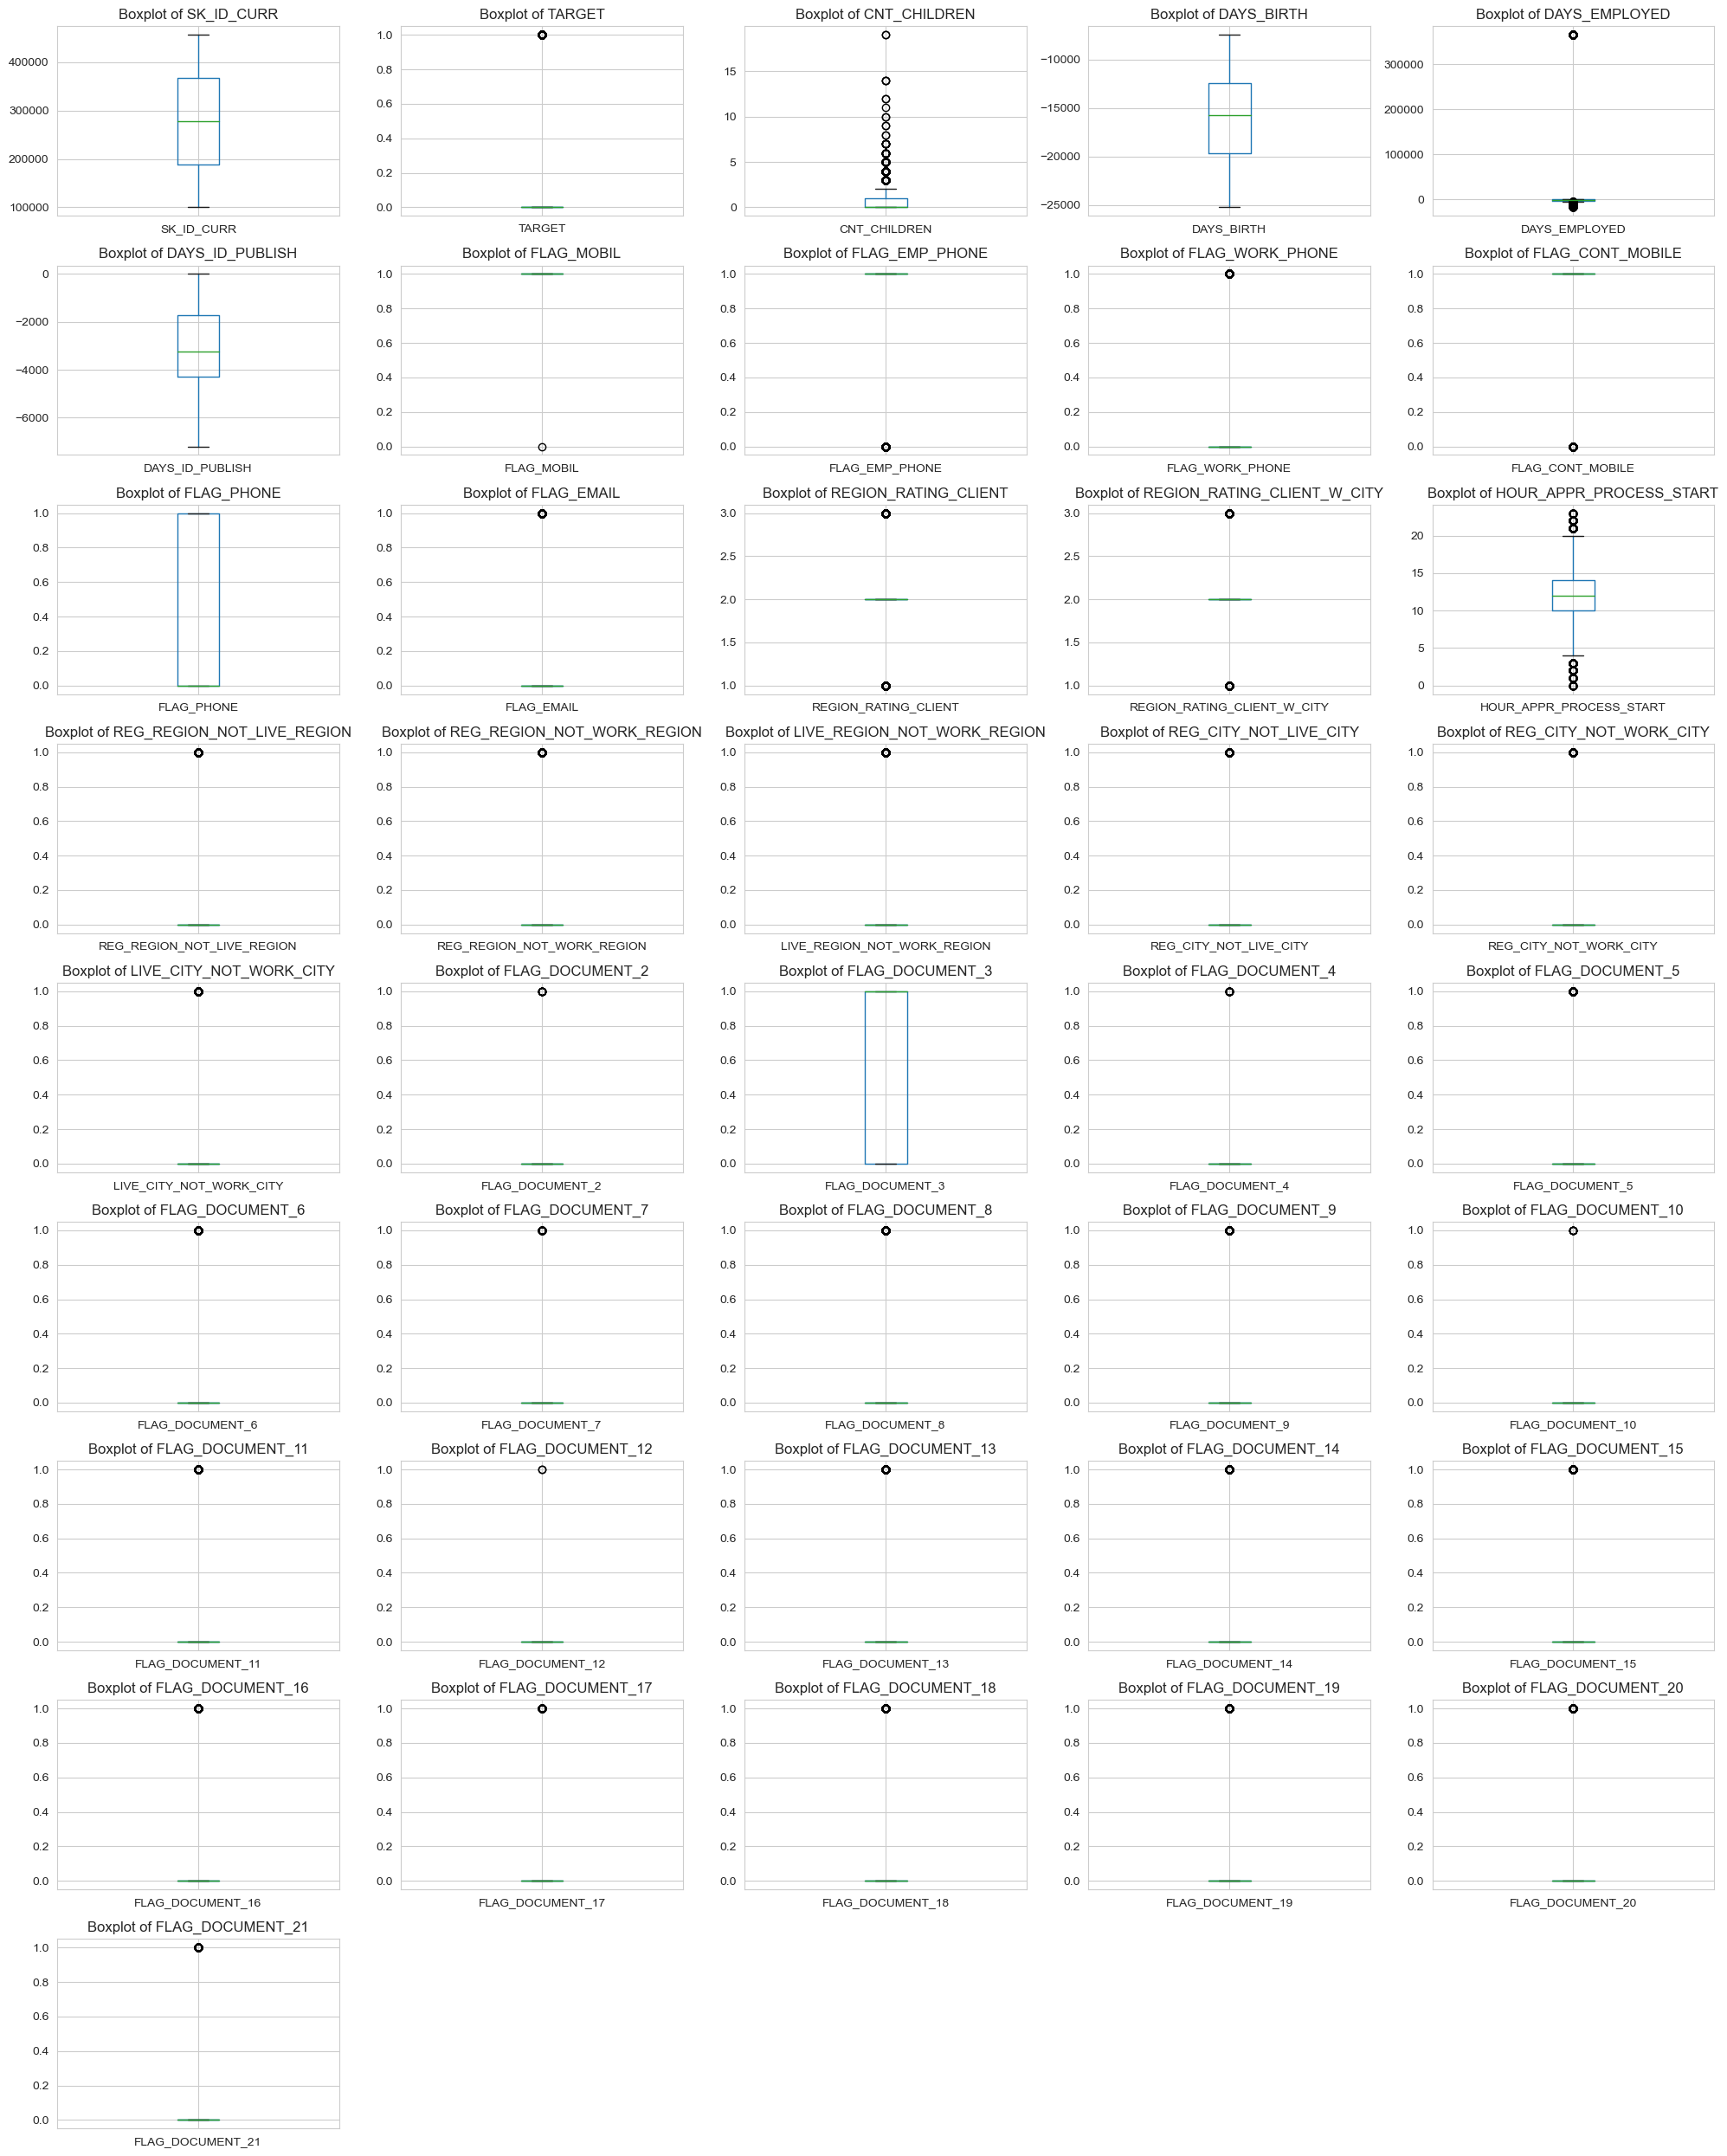

In [34]:

#SEPRATING int and obj column
int_columns = []
obj_columns = []

for column in data.columns:
    if data[column].dtype == 'int64':
        int_columns.append(column)
    elif data[column].dtype == 'object':
        obj_columns.append(column)


plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in int_columns:
    if plotnumber<=200 :
        ax = plt.subplot(9,5,plotnumber)
        
        
        data.boxplot(column=column) 
        plt.title('Boxplot of {}'.format(column))

        
    plotnumber+=1
plt.tight_layout()

Some of the column have some outliers needs to be fixed

## Features Selection

### Heatmap

<AxesSubplot:>

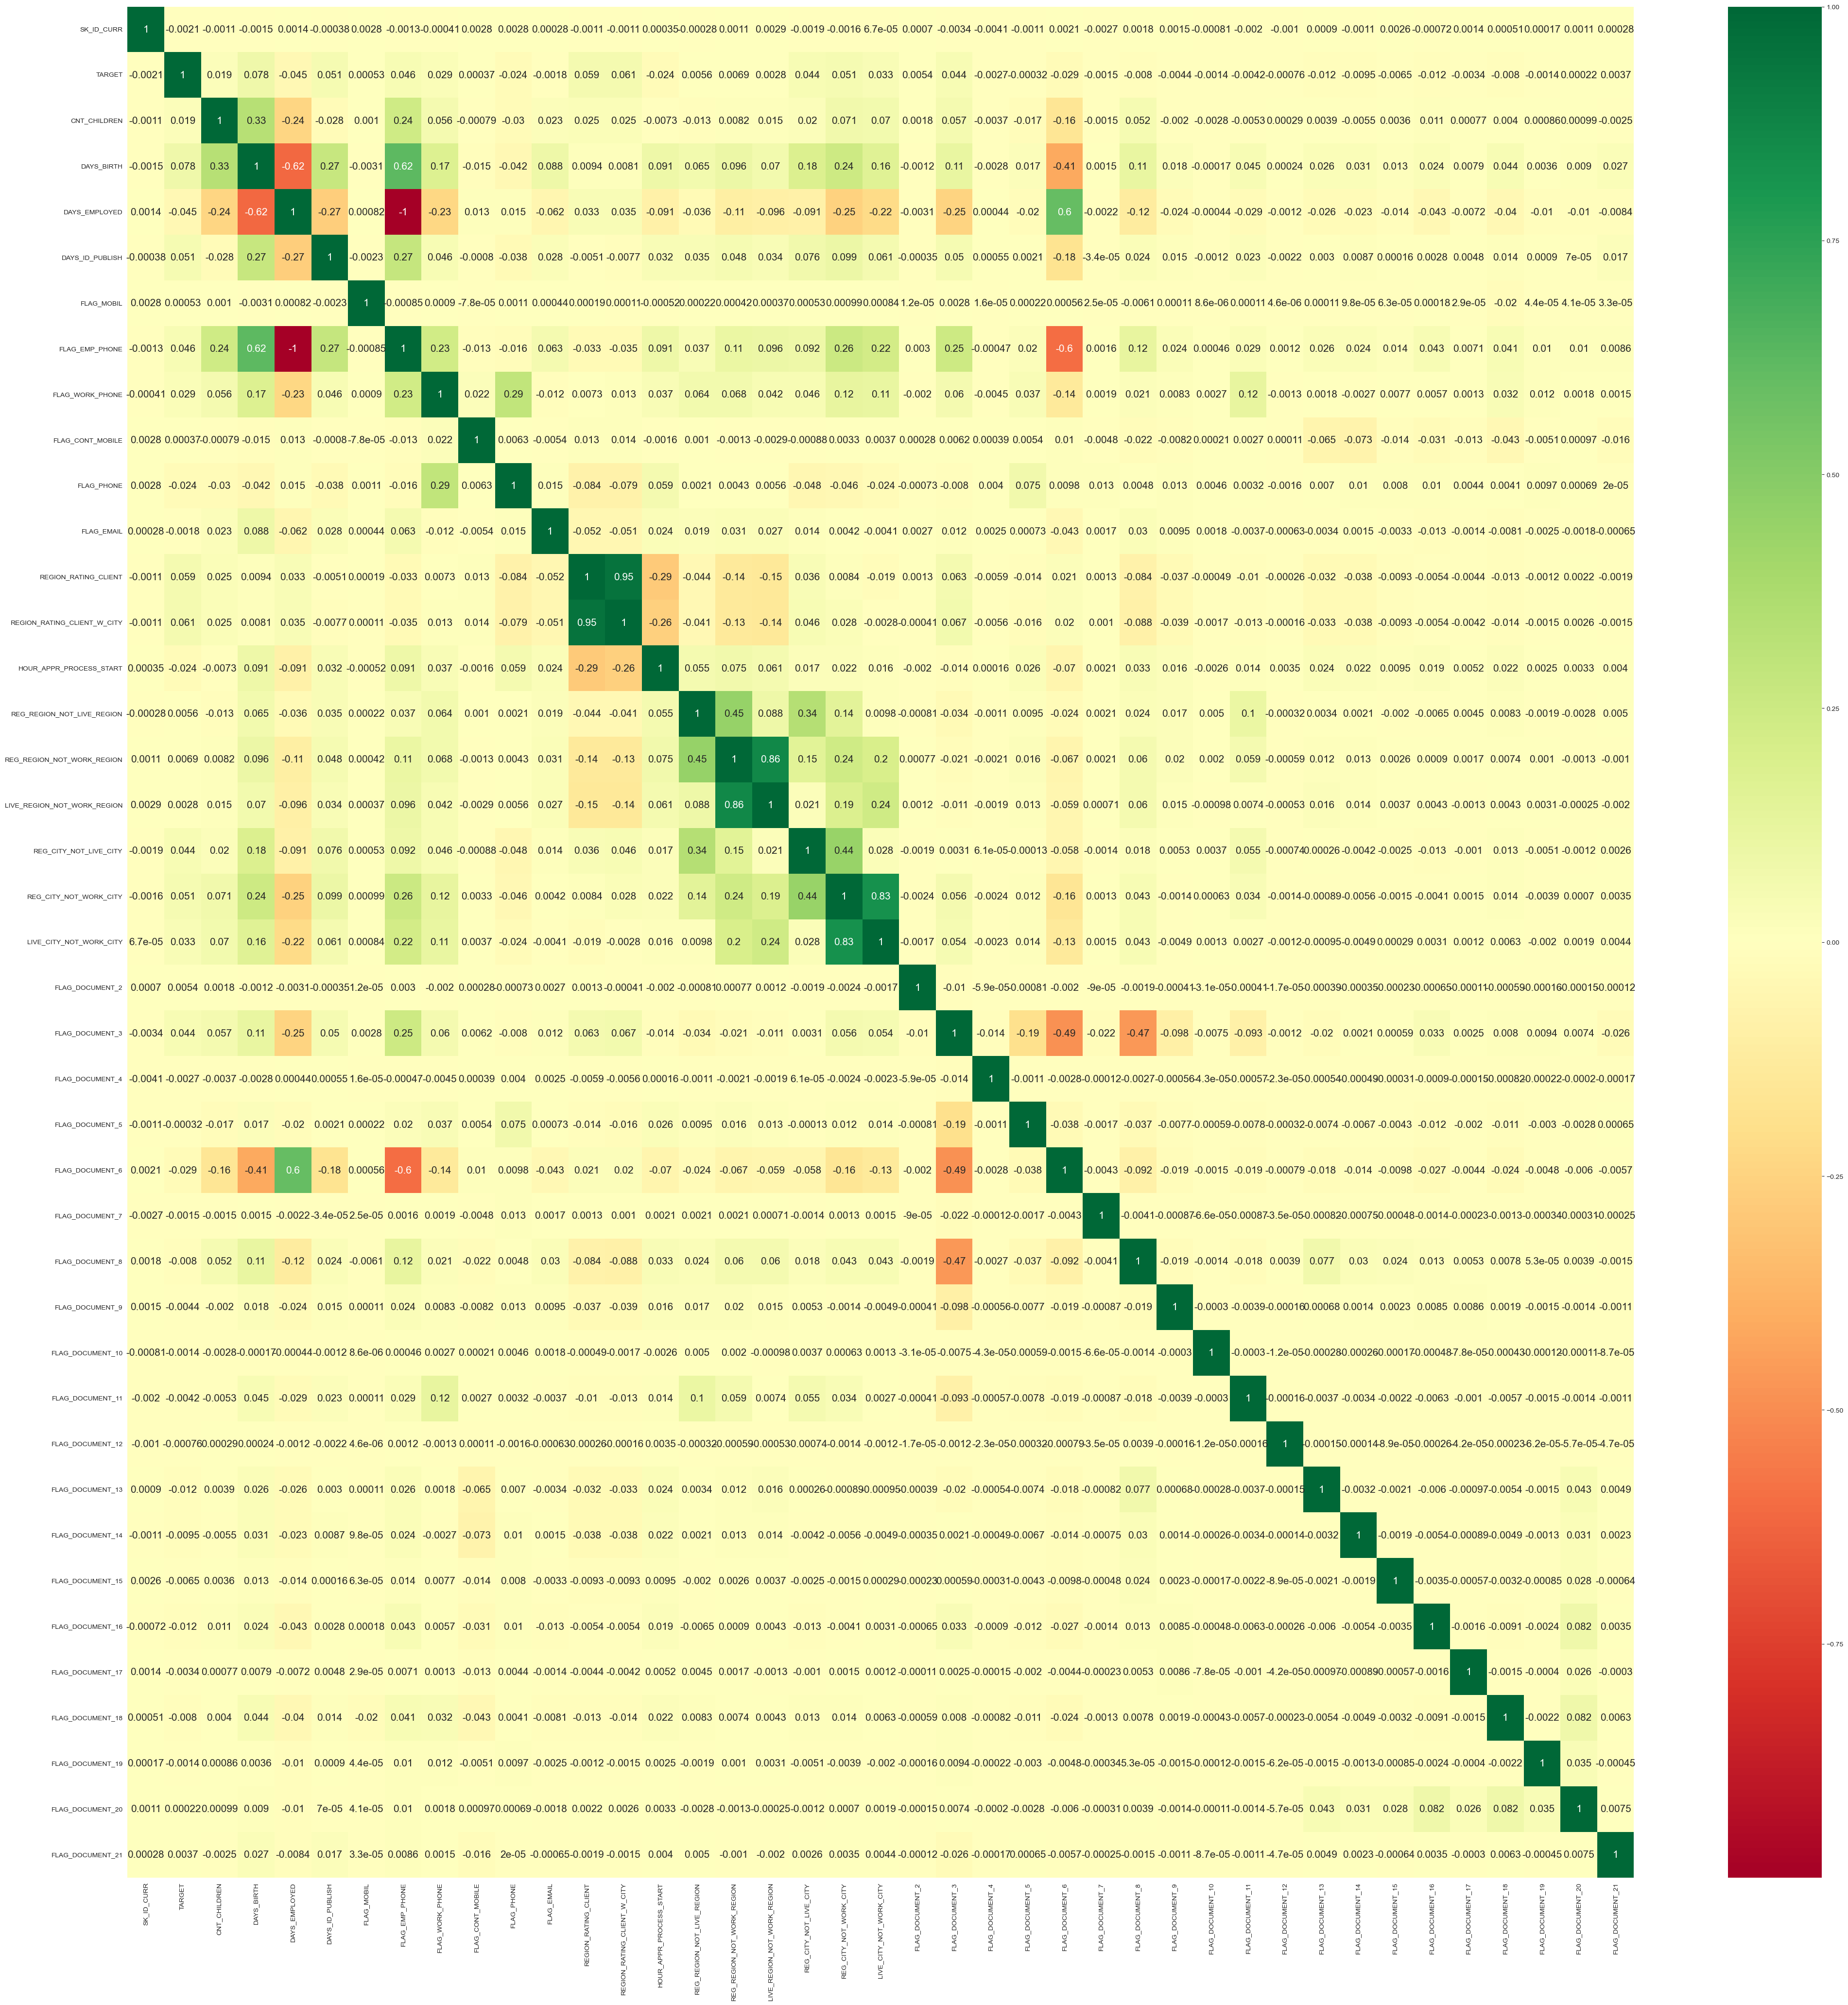

In [35]:
plt.figure(figsize=(50,50))#canvas size

corr = data[int_columns].corr()
sns.heatmap(corr, annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

There are lot of correlated column which needs to be drop.

In [36]:
corr_matrix = data.corr()

#Identify highly correlated columns

threshold = 0.8
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

correlated_features

{'AMT_GOODS_PRICE',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_FAM_MEMBERS',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'FLAG_EMP_PHONE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'REGION_RATING_CLIENT_W_CITY',
 'TOTALAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE'}

## Drop correlated columns

In [37]:
data.drop(correlated_features, axis=1,inplace=True)

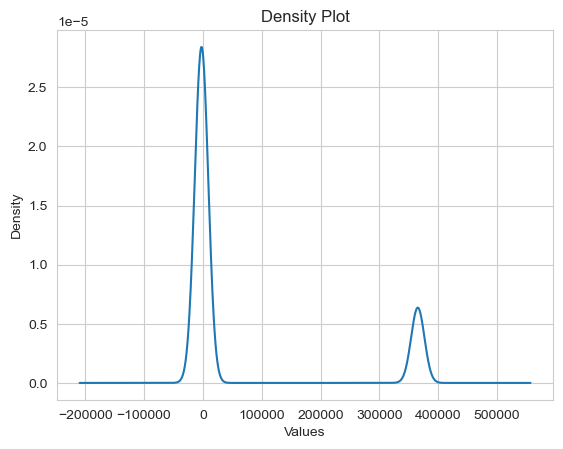

In [38]:
# Plot density plot
data['DAYS_EMPLOYED'].plot(kind='density')
plt.title('Density Plot')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

In [39]:
count = data['DAYS_EMPLOYED'].value_counts()[365243]
print(count)


55374


In [40]:
#function to replace DAYS_EMPLOYED outliers with NaN
def replace_day_outliers(df):
    """Replace 365243 with np.nan in any columns with DAYS"""
    for col in df.columns:
        if "DAYS" in col:
            df[col] = df[col].replace({365243: np.NaN})

    return df

In [41]:
# Replace all the day outliers
data_new = replace_day_outliers(data)

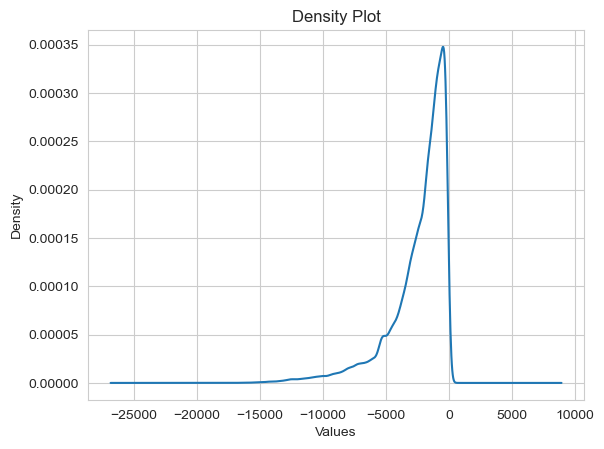

In [42]:
# Plot density plot
data_new['DAYS_EMPLOYED'].plot(kind='density')
plt.title('Density Plot')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()


### Removing columns which has missing values more than 60%

In [43]:
def remove_missing_col(df):
    miss_data = pd.DataFrame((df.isnull().sum())*100/df.shape[0])
    miss_data_col=miss_data[miss_data[0]>60].index
    data_new  = df[[i for i in df.columns if i not in miss_data_col]]
    return data_new

In [44]:
data_new = remove_missing_col(data)

## Model Creation

In [45]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with median of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [46]:
data_train = pd.get_dummies(data_new)

In [47]:
data_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 198 columns):
 #    Column                                             Non-Null Count   Dtype  
---   ------                                             --------------   -----  
 0    SK_ID_CURR                                         307511 non-null  int64  
 1    TARGET                                             307511 non-null  int64  
 2    CNT_CHILDREN                                       307511 non-null  int64  
 3    AMT_INCOME_TOTAL                                   307511 non-null  float64
 4    AMT_CREDIT                                         307511 non-null  float64
 5    AMT_ANNUITY                                        307499 non-null  float64
 6    REGION_POPULATION_RELATIVE                         307511 non-null  float64
 7    DAYS_BIRTH                                         307511 non-null  int64  
 8    DAYS_EMPLOYED                                      252137 non-

plt.figure(figsize=(10,10))

for column in int_columns:
    sns.kdeplot(data_new[column], shade=True)
plt.show()

### Scaling the data

In [48]:
# Drop the SK_ID from the training data
from sklearn.preprocessing import MinMaxScaler
skid_temp = data_new['SK_ID_CURR']
train = data_train.drop(columns = ['SK_ID_CURR'])
    
# Feature names
features = list(train.columns)

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Median imputation of missing values
train = DataFrameImputer().fit_transform(train)

## Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
data_train = pd.DataFrame(data=train, columns=features)

print('Data shape: ', data_train.shape)

Data shape:  (307511, 197)


In [49]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 197 entries, TARGET to EMERGENCYSTATE_MODE_Yes
dtypes: float64(197)
memory usage: 462.2 MB


In [50]:
int_columns = []
obj_columns = []

for column in data_new.columns:
    if data_new[column].dtype == 'int64':
        int_columns.append(column)
    elif data_new[column].dtype == 'object':
        obj_columns.append(column)

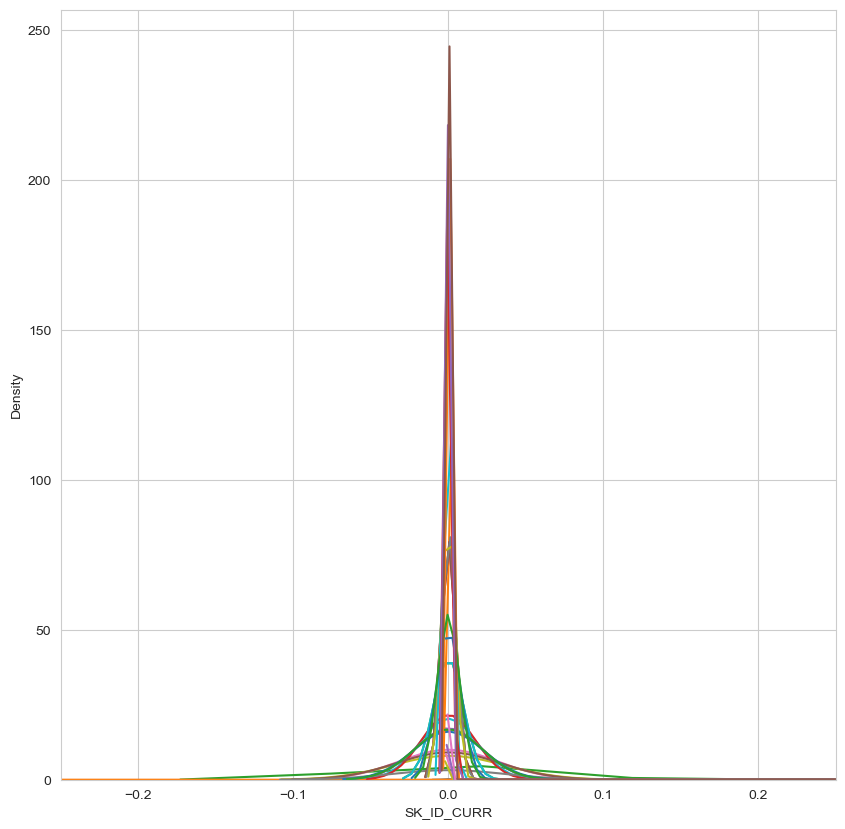

In [51]:
plt.figure(figsize=(10,10))

for column in int_columns:
    sns.kdeplot(data_new[column])
plt.xlim(-.25,.25)
plt.show()

### Splitting the data (train test split)

In [52]:
X= data_train.drop('TARGET',axis=1)
y= data_train['TARGET']

In [53]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.25, stratify=y, random_state=42)

## Balancing the dataset 

In [54]:
y_train.shape

(230633,)

In [55]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE oversampling to the resampled training data
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [56]:
from collections import Counter

print(f"X_train: {Counter(y_train)}")
print('=============================')
print(f"X_train_resampled: {Counter(y_train_oversampled)}")

X_train: Counter({0.0: 212014, 1.0: 18619})
X_train_resampled: Counter({0.0: 212014, 1.0: 212014})


In [57]:

value= [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(),  KNeighborsClassifier() , 
        AdaBoostClassifier(),GradientBoostingClassifier(), XGBClassifier()]

key= ['LogisticRegression', 'RandomForsetClassifier', 'DecisionTreeClassifier',  'KNeighborsClassifier',
      'AdaBoostClassifier','GradientBoostingClassifier', 'XGBClassifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train_oversampled, y_train_oversampled)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy)

LogisticRegression
0.6938135747548063
RandomForsetClassifier
0.9164390332734983
DecisionTreeClassifier
0.8411639220583261
KNeighborsClassifier
0.6542443872109056
AdaBoostClassifier
0.8615468664637478
GradientBoostingClassifier
0.917843856499909
XGBClassifier
0.9184812300007804


<AxesSubplot:>

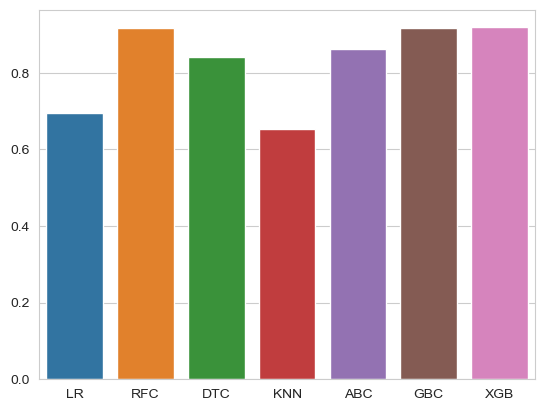

In [58]:
sns.barplot(x= ['LR','RFC','DTC','KNN','ABC','GBC','XGB'],y=accuracy_scores)

### Model Comparison Report
Based on the accuracies of the models, the XGBoost Classifier has the highest accuracy of 0.919, closely followed by the Random Forest Classifier with an accuracy of 0.917. These two models outperform the other models in terms of accuracy.

Recommendation for the Best Model:

Considering the high accuracy and strong performance, the XGBoost Classifier is recommended as the best model for production. XGBoost is an advanced boosting algorithm known for its effectiveness in handling complex datasets and producing accurate predictions. It combines the strengths of gradient boosting and parallel computing, leading to enhanced performance and scalability.

# Report on Home Loan Default Prediction Dataset

## Dataset Overview:

The dataset is focused on home loan default prediction.
The dataset contains information about various factors such as borrower characteristics, loan details, credit history, and other relevant features.
The dataset exhibits challenges like outliers, missing values, class imbalance, and correlated variables.

### Challenges Faced:

a. Outliers:

Identified the presence of outliers in certain numerical features.
Outliers can negatively impact model performance and should be addressed.
Applied outlier detection techniques such as z-score or IQR (Interquartile Range) method to identify and handle outliers.

b. Missing Values:

Observed missing values in the dataset.
Missing values can affect model training and performance.
Employed techniques like mean imputation, median imputation, or using advanced imputation methods (e.g., MICE or KNN) to fill missing values based on the feature type and data distribution.

c. Imbalanced Dataset:

Noticed class imbalance in the target variable, with a majority of non-default instances and a minority of default instances.
Class imbalance can lead to biased model performance and poor prediction for the minority class.
Utilized techniques like  SMOTE to address the class imbalance issue.
SMOTE oversampling technique generated synthetic samples for the minority class to enhance representation.

d. Correlated Variables:

Identified correlation among certain features in the dataset.
Correlated variables can introduce multicollinearity and affect model interpretability and performance.
Conducted correlation analysis and used techniques like feature selection or dimensionality reduction (e.g., PCA) to handle correlated variables and retain the most informative features.

### Techniques Used:

Outlier Handling: Applied z-score method to detect and remove outliers beyond a threshold or used IQR method to eliminate outliers based on quartiles.

Missing Value Imputation: Utilized mean or median imputation based on feature characteristics, or advanced techniques like imputation to fill missing values.

Class Imbalance Handling: Employed SMOTE to oversample the minority class and generate synthetic samples for improved representation.

Correlated Variables: Conducted correlation analysis among features and performed feature selection to handle correlated variables and retain essential information.

### Reasoning:

Outliers were addressed to ensure robustness and prevent them from affecting model training and performance.
Missing values were imputed to avoid loss of valuable information and ensure completeness of the dataset.
Class imbalance techniques were used to provide equal representation to both classes and improve the model's ability to predict default instances accurately.
Correlated variables were handled to mitigate multicollinearity issues and enhance model interpretability and generalization.
By addressing these challenges and applying the appropriate techniques, the dataset was prepared for model training and evaluation, enabling more accurate predictions for home loan default prediction.